<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Intro-to-the-project" data-toc-modified-id="0.-Intro-to-the-project-1">0. Intro to the project</a></span></li><li><span><a href="#1.-Data-Cleaning-and-pre-processing" data-toc-modified-id="1.-Data-Cleaning-and-pre-processing-2">1. Data Cleaning and pre-processing</a></span><ul class="toc-item"><li><span><a href="#1.1.-Download-libraries-and-first-description-of-the-data" data-toc-modified-id="1.1.-Download-libraries-and-first-description-of-the-data-2.1">1.1. Download libraries and first description of the data</a></span></li><li><span><a href="#1.2.-Reviews-Dates" data-toc-modified-id="1.2.-Reviews-Dates-2.2">1.2. Reviews Dates</a></span></li><li><span><a href="#1.3.-Review-Score--How-many-reviews-do-I-have-for-each-rating?" data-toc-modified-id="1.3.-Review-Score--How-many-reviews-do-I-have-for-each-rating?-2.3">1.3. Review Score -How many reviews do I have for each rating?</a></span></li><li><span><a href="#1.4.-Reviews-lenght" data-toc-modified-id="1.4.-Reviews-lenght-2.4">1.4. Reviews lenght</a></span></li><li><span><a href="#1.6.-Character-length" data-toc-modified-id="1.6.-Character-length-2.5">1.6. Character length</a></span></li></ul></li><li><span><a href="#2.-Reviews-cleaning" data-toc-modified-id="2.-Reviews-cleaning-3">2. Reviews cleaning</a></span><ul class="toc-item"><li><span><a href="#2.1.-First-cleaning" data-toc-modified-id="2.1.-First-cleaning-3.1">2.1. First cleaning</a></span></li><li><span><a href="#2.2.-Create-own-corpus-for-cleaning--Tokenizing" data-toc-modified-id="2.2.-Create-own-corpus-for-cleaning--Tokenizing-3.2">2.2. Create own corpus for cleaning- Tokenizing</a></span></li><li><span><a href="#2.3.-Stemming" data-toc-modified-id="2.3.-Stemming-3.3">2.3. Stemming</a></span></li><li><span><a href="#2.4.-Lemmatization" data-toc-modified-id="2.4.-Lemmatization-3.4">2.4. Lemmatization</a></span></li><li><span><a href="#2.5.-Second-function-for-pre-processing-the-data" data-toc-modified-id="2.5.-Second-function-for-pre-processing-the-data-3.5">2.5. Second function for pre-processing the data</a></span></li><li><span><a href="#2.6.-Another-approach--keeping-nouns,-verbs-and-adjectives" data-toc-modified-id="2.6.-Another-approach--keeping-nouns,-verbs-and-adjectives-3.6">2.6. Another approach  keeping nouns, verbs and adjectives</a></span></li></ul></li><li><span><a href="#3.-Plots-most-frequent-words" data-toc-modified-id="3.-Plots-most-frequent-words-4">3. Plots most frequent words</a></span><ul class="toc-item"><li><span><a href="#3.1.-Negative-Reviews" data-toc-modified-id="3.1.-Negative-Reviews-4.1">3.1. Negative Reviews</a></span></li><li><span><a href="#3.2.-Neutral-reviews" data-toc-modified-id="3.2.-Neutral-reviews-4.2">3.2. Neutral reviews</a></span></li><li><span><a href="#3.3.-Positive-Reviews" data-toc-modified-id="3.3.-Positive-Reviews-4.3">3.3. Positive Reviews</a></span></li></ul></li><li><span><a href="#4.-Exploring-specific-features-per-class" data-toc-modified-id="4.-Exploring-specific-features-per-class-5">4. Exploring specific features per class</a></span></li><li><span><a href="#5.-Creating-the-data-frame-with-the-selected-50-top-words" data-toc-modified-id="5.-Creating-the-data-frame-with-the-selected-50-top-words-6">5. Creating the data frame with the selected 50 top words</a></span></li><li><span><a href="#6.-Time-series-visualizations" data-toc-modified-id="6.-Time-series-visualizations-7">6. Time series visualizations</a></span></li><li><span><a href="#7.-Fixing-the-clas-unbalance" data-toc-modified-id="7.-Fixing-the-clas-unbalance-8">7. Fixing the clas unbalance</a></span></li><li><span><a href="#8.-Building-models" data-toc-modified-id="8.-Building-models-9">8. Building models</a></span><ul class="toc-item"><li><span><a href="#8.1.Split-data" data-toc-modified-id="8.1.Split-data-9.1">8.1.Split data</a></span></li><li><span><a href="#8.2.-Randoom-Forest-Classifier--with-unbalanced-classes" data-toc-modified-id="8.2.-Randoom-Forest-Classifier--with-unbalanced-classes-9.2">8.2. Randoom Forest Classifier  with unbalanced classes</a></span></li><li><span><a href="#8.3.-Randoom-Forest-Classifier--with-balanced-classes" data-toc-modified-id="8.3.-Randoom-Forest-Classifier--with-balanced-classes-9.3">8.3. Randoom Forest Classifier  with balanced classes</a></span></li></ul></li><li><span><a href="#9.-TF-IDF" data-toc-modified-id="9.-TF-IDF-10">9. TF-IDF</a></span><ul class="toc-item"><li><span><a href="#9.-Create-data-fram-ewith-2g-vectors" data-toc-modified-id="9.-Create-data-fram-ewith-2g-vectors-10.1">9. Create data fram ewith 2g vectors</a></span></li><li><span><a href="#9.-Exploring-3g-vectors-frecuencies" data-toc-modified-id="9.-Exploring-3g-vectors-frecuencies-10.2">9. Exploring 3g vectors frecuencies</a></span></li><li><span><a href="#9.1.-Negative-Reviews" data-toc-modified-id="9.1.-Negative-Reviews-10.3">9.1. Negative Reviews</a></span><ul class="toc-item"><li><span><a href="#9.1.1.-2-g-vector" data-toc-modified-id="9.1.1.-2-g-vector-10.3.1">9.1.1. 2 g vector</a></span></li><li><span><a href="#9.1.1.-2-g-vector" data-toc-modified-id="9.1.1.-2-g-vector-10.3.2">9.1.1. 2 g vector</a></span></li></ul></li><li><span><a href="#9.3.-Neutral-Reviews" data-toc-modified-id="9.3.-Neutral-Reviews-10.4">9.3. Neutral Reviews</a></span><ul class="toc-item"><li><span><a href="#9.3.1.-2-g-vector" data-toc-modified-id="9.3.1.-2-g-vector-10.4.1">9.3.1. 2 g vector</a></span></li><li><span><a href="#9.3.1.-3-g-vector" data-toc-modified-id="9.3.1.-3-g-vector-10.4.2">9.3.1. 3 g vector</a></span></li></ul></li><li><span><a href="#9.3.-Positive-Reviews" data-toc-modified-id="9.3.-Positive-Reviews-10.5">9.3. Positive Reviews</a></span><ul class="toc-item"><li><span><a href="#9.3.1.-2-g-vectors" data-toc-modified-id="9.3.1.-2-g-vectors-10.5.1">9.3.1. 2 g vectors</a></span></li><li><span><a href="#9.3.2.-3-g-vectors" data-toc-modified-id="9.3.2.-3-g-vectors-10.5.2">9.3.2. 3 g vectors</a></span></li></ul></li><li><span><a href="#9.2.Modelling-with-3g-vectors" data-toc-modified-id="9.2.Modelling-with-3g-vectors-10.6">9.2.Modelling with 3g vectors</a></span></li></ul></li></ul></div>

# 0. Intro to the project

For this projects I wanted to learn how to work with text and get insides from it.
I decided to do a NLP Analysis on reviews.
I picked a restaurant in Amsterdam, the city where I live. I have work previously in the sector and that was one way to connect both worlds (Hospitality and Data Analysis).

This restaurant is a pretty popular sustainable restaurant that was open in 2001.

They have gardens in Amsterdam and the Beemster.
They grow their vegetables in the garden as well as hydroponically inside the greenhouse.  Hydrophonics is a way to skip the soil, substitute for different material to support the roots of the plant, and grow crops directly in nutrient-rich water. 




In [399]:
#!pip install nltk

# 1. Data Cleaning and pre-processing

## 1.1. Download libraries and first description of the data

In [400]:
import pandas as pd
import numpy as np
import nltk

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import string

from nltk.tokenize import sent_tokenize, word_tokenize

In [401]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /Users/lauratll/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lauratll/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lauratll/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/lauratll/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

This data frame consists on the reviews from the Restaurant De Kas in Amsterdam. This is a sustainbale restaurant that has its own garden and it is consider sustainable. They grown their seasonal vegetables and cook what is available.

In this study we will try to know which features costumers appreciate and value from the resturant.

We will start doing a description of the data, cleanin and preprocessing.

In [402]:
kas = pd.read_csv("../data/kas_reviews.csv")

In [403]:
#Check for the nuumber of rows/reviews and the type of the features
kas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      1308 non-null   int64 
 1   Score   1308 non-null   int64 
 2   Date    1308 non-null   object
 3   Title   1308 non-null   object
 4   Review  1308 non-null   object
dtypes: int64(2), object(3)
memory usage: 51.2+ KB


In [404]:
#Check the number of unique values for the ID column
kas["Id"].unique

<bound method Series.unique of 0       798058056
1       796220834
2       792789843
3       788354190
4       778227856
          ...    
1303     23658332
1304     21557669
1305     19592320
1306     18857462
1307     18551995
Name: Id, Length: 1308, dtype: int64>

In [405]:
kas.drop_duplicates(subset=["Id"])

,Id,Score,Date,Title,Review
0,798058056,10,"July 19, 2021",Poor communication,Poor communication towards freelancers. Not re...
1,796220834,50,"July 8, 2021",Fabulous,After an hour drive from Makkum in the Friesla...
2,792789843,50,"June 16, 2021",Nice Restaurant,If you go for 6 dishes they appear to have a w...
3,788354190,50,"May 9, 2021",Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...
4,778227856,50,"November 30, 2020",So fresh! So tasty!,Ingredients were freshly picked from the garde...
...,...,...,...,...,...
1303,23658332,50,"January 12, 2009",Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...
1304,21557669,50,"November 4, 2008",Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam..."
1305,19592320,50,"August 31, 2008",a new must in Amsterdam,I had a great dinner at this restaurant in the...
1306,18857462,40,"August 11, 2008",A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...


This data set has 6 columns:

`Id` : id from the review

`Score`: the socre of the review over 50 (can just be 10,20,30, 40 or 50)

`Date`: the day that the reviews was post 

`Tile`:  the header from the review

`Review`: the text from the review.


It consists of 1308 rows, each ona a unique review (there are not duplicates).
The features Date need to be changed to datetime variable.

In [406]:
#Check for misssing values
kas.isna().sum()

Id        0
Score     0
Date      0
Title     0
Review    0
dtype: int64

For now, we can not see any missing value.

## 1.2. Reviews Dates

In [407]:
kas["Date"]= pd.to_datetime(kas["Date"])

## 1.3. Review Score -How many reviews do I have for each rating?

We scale the score to 1 to 5, with double // we get rid of the decimals.

In [408]:
kas["Score"] = kas["Score"] // 10

In [409]:
kas["Score"].value_counts()

5    945
4    242
3     76
2     33
1     12
Name: Score, dtype: int64

It is, as expected, a class inbalance... The majority of the reviews are on the class 5, followed by 4.
We could crete a class good as for score 4-5 and another and not good as 1-2-3.
Or we could also try to correct this class unbalance by:

- downsampling
- upsampling
- inferation

This plot represents the number of reviews per score category. As we could, already see on the number before, there is a big difference between the reviews with a score og 5, ans the rest.

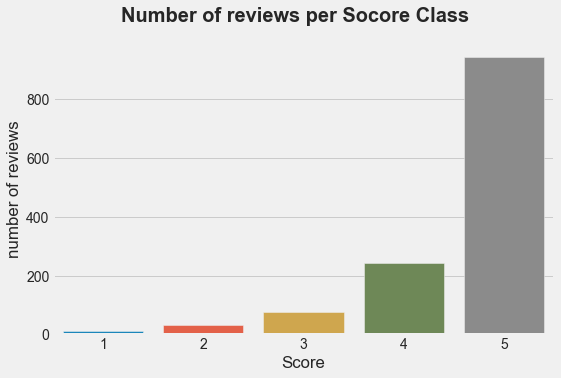

In [410]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1,1,figsize = (8,5),sharex=True)
fig.suptitle('Number of reviews per Socore Class', size='20', fontweight='bold')
sns.countplot(x=kas['Score'])
ax.set_ylabel("number of reviews")
plt.savefig("../Figures/reviews_x_score.png",dpi=300);

We can group the reviews on 2 groups to see if that balances a bit the issue.

In [411]:
#kas['rating_binary'] = kas['Score'].apply(lambda x: 0 if x < 3 else 1)

## 1.4. Reviews lenght 

In [412]:
#we are gonna apply a lamba function into the column reviews. We split the words and count them.
kas['Length'] = kas['Review'].apply(lambda x: len(str(x).split()))


In [413]:
kas.head()

,Id,Score,Date,Title,Review,Length
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26


In [414]:
kas["Date"].min()

Timestamp('2008-08-02 00:00:00')

/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


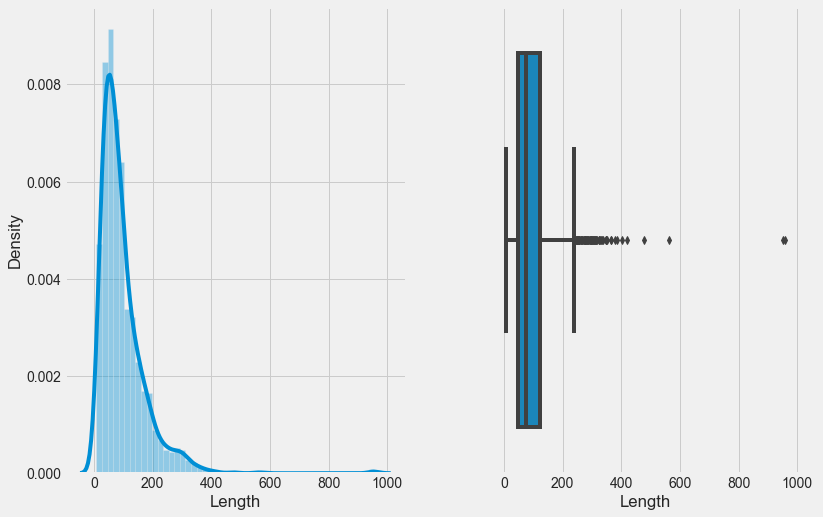

In [415]:
fig, ax = plt.subplots(1,2,figsize = (12,8),sharex=True)
sns.distplot( kas['Length'],ax=ax[0])
sns.boxplot( kas['Length'],ax=ax[1]);

The distribution of the lengths of the reviews is pretty skewed to the right.

In [416]:
kas[kas['Length'] == kas['Length'].max()]["Review"].index[0] #the longest review

997

In [417]:
kas.drop(index=997, inplace=True)

/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


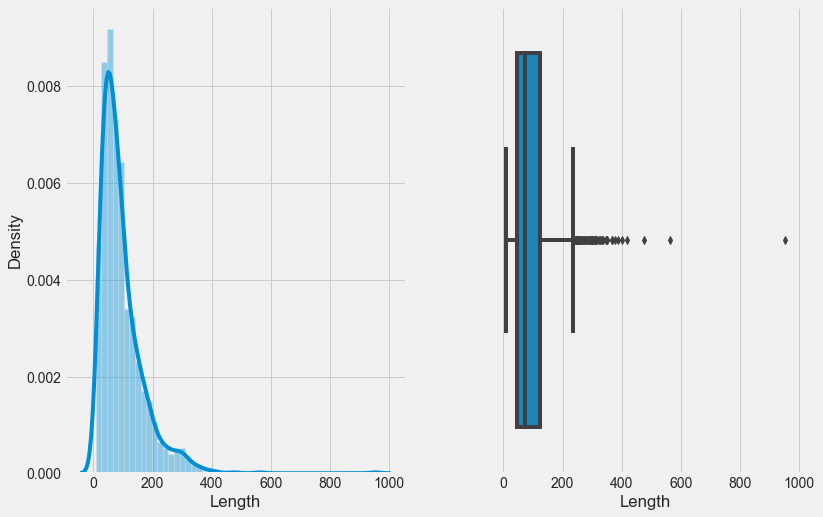

In [418]:
fig, ax = plt.subplots(1,2,figsize = (12,8),sharex=True)
sns.distplot( kas['Length'],ax=ax[0])
sns.boxplot( kas['Length'],ax=ax[1]);

In [419]:
kas[kas['Length'] == kas['Length'].max()]["Review"].index[0]

923

In [420]:
kas.drop(index=923, inplace=True)

In [421]:
kas[kas['Length'] == kas['Length'].min()]["Review"] #the shortest review

1192    Very good tasting food and extremely good serv...
Name: Review, dtype: object

We wil have to think if the short reviews are bringing any interesting information.

In [422]:
#pd.set_option("display.max_colwidth",50) #50 to ome back to show 50 characters, if you place -1, you can read the
#whole string. We are applying this to the columns

In [423]:
kas['Length'].describe()

count    1306.000000
mean       94.142420
std        70.330155
min         8.000000
25%        45.250000
50%        74.000000
75%       122.000000
max       564.000000
Name: Length, dtype: float64

In [424]:
kas.groupby("Score")['Length'].mean() #negative 

Score
1    131.833333
2    129.939394
3    121.065789
4     95.884298
5     89.793213
Name: Length, dtype: float64

## 1.6. Character length

In [425]:
kas['num_charac'] = kas['Review'].apply(lambda x: len(x))

In [426]:
kas.groupby("Score")['num_charac'].mean() 

Score
1    722.083333
2    726.000000
3    664.078947
4    536.995868
5    508.768823
Name: num_charac, dtype: float64

# 2. Reviews cleaning

## 2.1. First cleaning

We will create a function to clean the review.

We will remove the non alpha- numeric characters, convert all to lower case, email adresses or html tags or websites.

In [427]:
### I would like to see how many entries hae digits on the Review colum

kas[kas["Review"].str.contains(r'\d+')]["Review"] #466 reviews have numbers...


1       After an hour drive from Makkum in the Friesla...
2       If you go for 6 dishes they appear to have a w...
6       We had a fantastic dinner, they took the Coron...
11      The food was nice and fresh, and the surroundi...
13      We were really looking forward to our dinner a...
                              ...                        
1299    I've been to De Kas eight times and used to lo...
1304    Ok, if you are planning on coming to Amsterdam...
1305    I had a great dinner at this restaurant in the...
1306    I went to De Kas with two friends that knew al...
1307    The only reason I did not give the absolute be...
Name: Review, Length: 464, dtype: object

We are gonna import a corpus with words that we consier would not be useful. We could append more words to this list. 

In [428]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english')) 

In [429]:
def clean_reviews_func1(data,column):
    
    
    #we convert all the word to lowe case
    data["cleaned"] = data[column].apply(lambda text: text.lower())
    # replace non alphanumeric by spaces
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'\W+',' ',text))
    # Replace urls by ''
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',' ',text))
    #Remove sites
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'www.\S+', ' ' ,text))
    #Remove Url's
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'^(http|https|ftp|ssh)\S+', ' ',text))
    #Remove digits
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'\d+',' ',text))
    #remove stop words, looping through the word in the review, if the word is not we return it if not
    data["cleaned"] = data["cleaned"].apply(lambda x : " ".join(word for word in x.split() if word not in stop_words))
    #apply the extra spaces function defined before
    data["cleaned"] = data["cleaned"].apply(lambda text: text.strip())

    return data
   


## We need to think about numbers and euros....    

In [430]:
kas = clean_reviews_func1(kas,"Review")

In [431]:
kas

,Id,Score,Date,Title,Review,Length,num_charac,cleaned
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15,117,poor communication towards freelancers reliabl...
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121,694,hour drive makkum friesland province meanderin...
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157,808,go dishes appear weekly menu options restauran...
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70,441,new favorite restaurant amsterdam prides servi...
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26,171,ingredients freshly picked garden restaurant d...
...,...,...,...,...,...,...,...,...
1303,23658332,5,2009-01-12,Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...,23,153,original setup yummy organic extremely local h...
1304,21557669,5,2008-11-04,Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam...",94,515,ok planning coming amsterdam tourist means avo...
1305,19592320,5,2008-08-31,a new must in Amsterdam,I had a great dinner at this restaurant in the...,46,264,great dinner restaurant last week august start...
1306,18857462,4,2008-08-11,A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...,92,547,went de kas two friends knew already restauran...


No we are gonna look at the frecuency of words, to see if there are some that are not interesting for us, to be able to also remove them from the reviews.

## 2.2. Create own corpus for cleaning- Tokenizing

No we are gonna look at the frecuency of words, to see if there are some that are not interesting for us, to be able to also remove them from the reviews.

We will create a corpus, database, of words in the reviews. This is an specific set of common words in the reviews for restaurant, for example.

I will create a corpus for the bosy of the reviews and count their frecuency.



In [432]:
###the words in the whole set of reviews
def create_corpus(data, column):
    """
    Input a data frame, and the a string of the name of the column you want to create the corpus
    It produces two outcomes:
    - the list_tokens as a list of tokens
    - the one_string_tokens as a string with all tokens
    """
 
    #create an empty string
    one_string_tokens = ''
    #we add every word in the 
    for review in data[column]:
        one_string_tokens += review
#     corpus = nltk.sent_tokenize(reviews)
    list_tokens = word_tokenize(one_string_tokens)
    
    return list_tokens,one_string_tokens

In [433]:
#A function for checking the frecuency from the corpus

def check_frecuency_word (data,column):
    corpus_reviews = create_corpus(data,column)[0]
    freq_words = pd.Series(corpus_reviews).value_counts()
    return freq_words

In [434]:
#Check firt 50 words
check_frecuency_word(kas,"cleaned")[:50]

food           1181
restaurant      823
menu            666
service         552
greenhouse      532
kas             499
course          484
wine            459
great           437
de              433
good            430
amsterdam       427
experience      389
fresh           381
meal            375
one             363
place           338
staff           331
would           317
well            312
us              301
vegetables      291
dinner          288
really          272
beautiful       267
table           263
delicious       254
set             248
park            247
nice            246
dishes          232
time            232
also            230
lunch           221
excellent       219
grown           219
setting         218
like            217
friendly        214
main            207
worth           205
get             203
ingredients     196
go              192
courses         190
served          190
lovely          190
dish            188
every           185
best            185


We will look at the 50 first words, and decide to exclude some that might now be meaninful for the analysis.

We will create a new list with words to exclude and remove them from the review column.


In [435]:
other_stop_words = ['food','restaurant','kas','de','amsterdam','one','would','every','really','even',
                    'also','go','table','us']

In [436]:
kas["cleaned"] =kas["cleaned"].apply(lambda x:" ".join(word for word in x.split() 
                                                              if word not in other_stop_words))

We look again at the frecuencies:

In [437]:
#Check firt 50 words
check_frecuency_word(kas,"cleaned")[:50]

menu           666
service        552
greenhouse     527
course         484
wine           457
great          432
good           423
experience     385
fresh          381
meal           371
place          334
staff          331
well           311
vegetables     291
dinner         286
beautiful      260
delicious      252
park           247
set            244
nice           241
dishes         231
lunch          220
grown          219
setting        218
excellent      216
like           216
friendly       214
time           213
main           207
worth          205
get            201
ingredients    196
courses        190
served         189
lovely         188
dish           186
amazing        176
chef           175
best           172
eat            171
day            170
dining         170
evening        159
visit          155
dessert        153
special        152
recommend      150
made           149
garden         148
fish           147
dtype: int64

## 2.3. Stemming

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization)
It does not keep a lookup table for actual stems of the word but applies algorithmic rules to generate stems. It uses the rules to decide whether it is wise to strip a suffix.

For now we will just define a function, but will apply lemmatization to the Reviews.

In [438]:
# len(list(wordfreq.keys()))

In [439]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()


def stem_word(data,column):
    data[column] = kas[column].apply(lambda x:" ".join(porter.stem(word) for word in x.split()))
    return data



## 2.4. Lemmatization

Lemmatization is similar to stemming but it brings context to the words.So it links words with similar meaning to one word. 

Lemmatization does morphological analysis of the words. In short, lemmatize the text so as to get its root form eg: functions,funtionality as function

In [440]:
#text blob is another library to do that ans also used for sentiment analysis.

In [441]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet

lemma = WordNetLemmatizer()


def lemmatize_word(data,column):
    data[column] = kas[column].apply(lambda x:" ".join(lemma.lemmatize(word) for word in x.split()))
    return data
    
    
#     return " ".join([lemma.lemmatize(word) for word in word_tokenize(data_text)])

In [442]:
kas = lemmatize_word(kas,"cleaned")
kas

,Id,Score,Date,Title,Review,Length,num_charac,cleaned
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15,117,poor communication towards freelancer reliable...
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121,694,hour drive makkum friesland province meanderin...
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157,808,dish appear weekly menu option serve given eve...
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70,441,new favorite pride serving creative absolutely...
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26,171,ingredient freshly picked garden dish beautifu...
...,...,...,...,...,...,...,...,...
1303,23658332,5,2009-01-12,Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...,23,153,original setup yummy organic extremely local h...
1304,21557669,5,2008-11-04,Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam...",94,515,ok planning coming tourist mean avoid tourist ...
1305,19592320,5,2008-08-31,a new must in Amsterdam,I had a great dinner at this restaurant in the...,46,264,great dinner last week august starter desert m...
1306,18857462,4,2008-08-11,A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...,92,547,went two friend knew already nice experience s...


## 2.5. Second function for pre-processing the data

In [443]:
#remove extra words
#lemmatization 
#put all together

## 2.6. Another approach  keeping nouns, verbs and adjectives

If we would take this approach, we will keep just words like nouns, verbs and adjectives.

-   NN	Noun

-	JJ	Adjective

-   VB	Verb

In [444]:

nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lauratll/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [445]:
def filter_review_by_gramma(x):
    words = []
    text = word_tokenize(x)
    tags = nltk.pos_tag(text)

    for tag in tags:
        if  re.search("JJ|NN|VB",tag[1]):
            words.append(tag[0])
            
    return " ".join(words)

#try as well removing the verbs?

In [446]:
kas["cleaned"].apply(lambda x : filter_review_by_gramma(x))[0]

'poor communication towards reliable unreasonable arrogant recommend place'

In [447]:
#nltk import me_chunk

# 3. Plots most frequent words

## 3.1. Negative Reviews

We like to create a wordcloud for each class.

In [448]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [449]:
#Negative

negative_reviews = kas[kas["Score"] < 3]

In [450]:
corpus_negative= create_corpus(negative_reviews, "cleaned")[1]

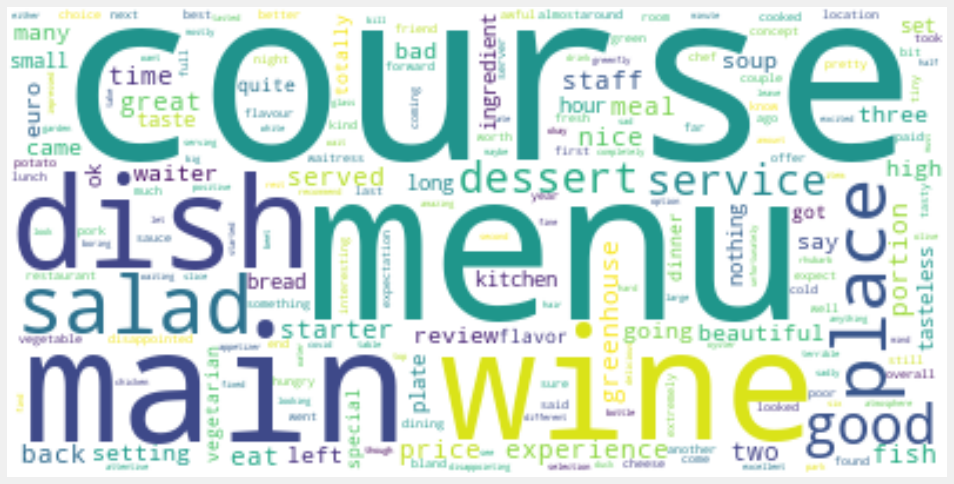

In [451]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(corpus_negative)

ax = plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("../Figures/word_cloud_negative.png",dpi=300)
plt.show()


In [452]:
check_frecuency_word(negative_reviews,"cleaned")

course                  32
menu                    24
main                    22
wine                    21
dish                    19
                        ..
irresponsiblelooking     1
formulaic                1
veal                     1
blown                    1
laurel                   1
Length: 1196, dtype: int64

## 3.2. Neutral reviews

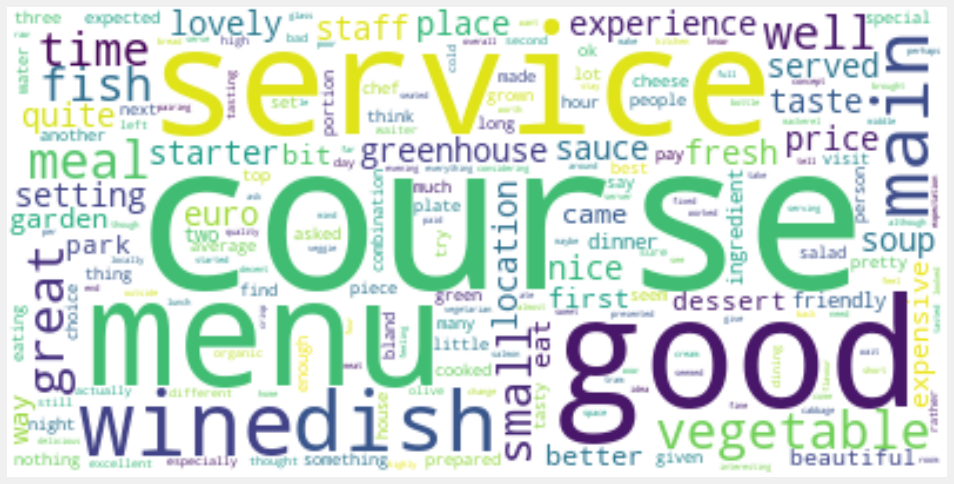

In [453]:
#Neutral

neutral_reviews = kas[kas["Score"] == 3]
corpus_neutral= create_corpus(neutral_reviews, "cleaned")[1]

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(corpus_neutral)

ax = plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("../Figures/word_cloud_neutral.png",dpi=300)
plt.show()

Looking at the cloud we see that costumers appreciate a lot 

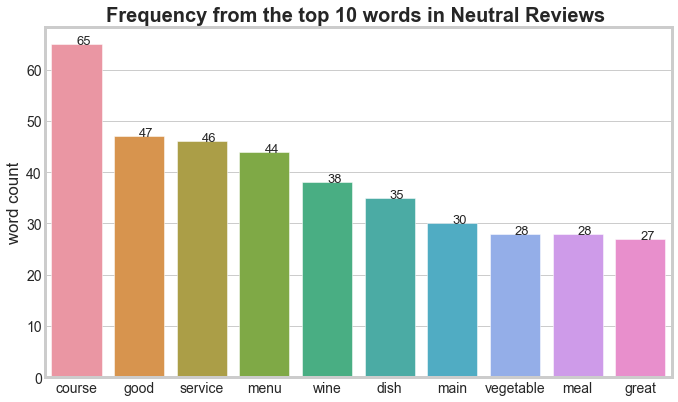

In [454]:
top_10_neutral_reviews = check_frecuency_word(neutral_reviews,"cleaned")[:10]

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.barplot(x= top_10_neutral_reviews .index,y=top_10_neutral_reviews .values)
plt.title("Frequency from the top 10 words in Neutral Reviews ",fontsize=20, fontweight='bold')
ax.set_ylabel("word count")

for index,data in enumerate(top_10_neutral_reviews .values):
    plt.text(x=index , y =data , s=f"{data}",fontdict=dict(fontsize=13))

## 3.3. Positive Reviews

In [455]:
#Positive reviews

positive_reviews = kas[kas["Score"] > 3]

In [456]:
corpus_postive= create_corpus(positive_reviews, "cleaned")[1]

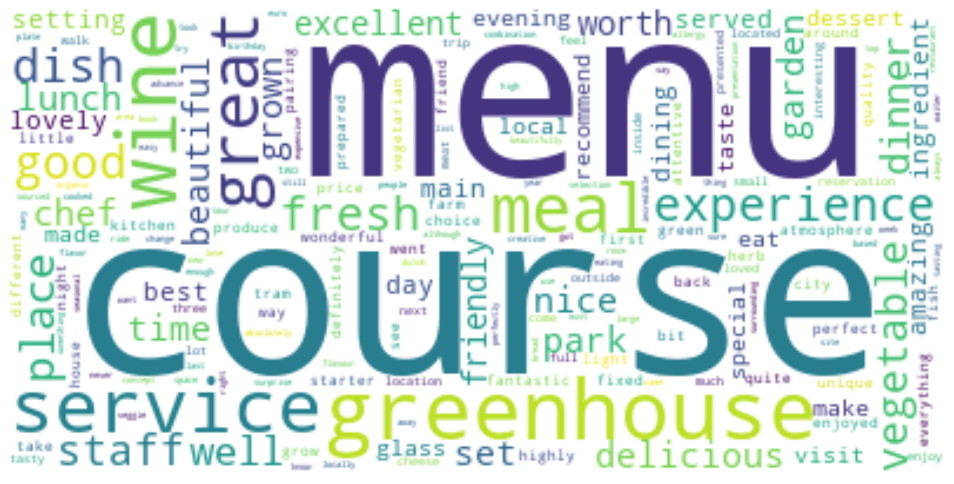

In [457]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(corpus_postive)

ax = plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("../Figures/word_cloud_positive.png",dpi=600)
plt.show()


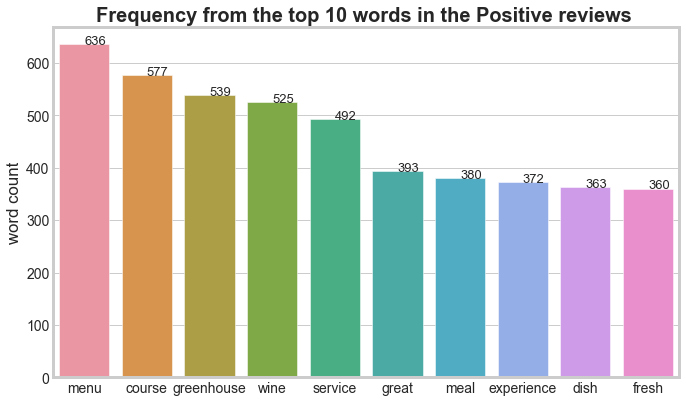

In [458]:
top_10_postive_reviews= check_frecuency_word(positive_reviews ,"cleaned")[:10]

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.barplot(x= top_10_postive_reviews.index,y=top_10_postive_reviews.values)
plt.title("Frequency from the top 10 words in the Positive reviews ",fontsize=20, fontweight='bold')
ax.set_ylabel("word count")

for index,data in enumerate(top_10_postive_reviews.values):
    plt.text(x=index , y =data , s=f"{data}",fontdict=dict(fontsize=13))

# 4. Exploring specific features per class


What we try to see here is how many time an speciic workd that we think is an important feature in the restaurant or should be somehow evaluate by the costumers, appears in the reviews per class.

Due to class inbalance we will divide by the total of reviews from each class.

In [459]:
kas["Score"].value_counts()

5    943
4    242
3     76
2     33
1     12
Name: Score, dtype: int64

In [460]:
kas[kas["cleaned"].str.contains("meat")]["Score"].value_counts() /kas["Score"].value_counts()


1         NaN
2    0.090909
3    0.052632
4    0.082645
5    0.067869
Name: Score, dtype: float64

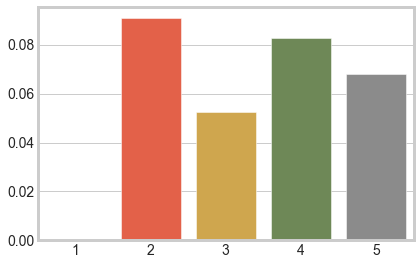

In [461]:
data=kas[kas["cleaned"].str.contains("meat")]["Score"].value_counts() /kas["Score"].value_counts()
sns.barplot( x=data.index, y=data.values);

In [462]:
kas[kas["cleaned"].str.contains("fish")]["Score"].value_counts()/kas["Score"].value_counts()


1    0.250000
2    0.090909
3    0.171053
4    0.132231
5    0.073171
Name: Score, dtype: float64

In [463]:
kas[kas["cleaned"].str.contains("seasonal")]["Score"].value_counts() /kas["Score"].value_counts()


1         NaN
2         NaN
3    0.013158
4    0.045455
5    0.055143
Name: Score, dtype: float64

In [464]:
kas[kas["cleaned"].str.contains("greenhouse")]["Score"].value_counts() /kas["Score"].value_counts()

5    0.383881
4    0.293388
3    0.236842
2    0.212121
1    0.250000
Name: Score, dtype: float64

In [465]:
kas[kas["cleaned"].str.contains("service")]["Score"].value_counts()/kas["Score"].value_counts()

5    0.379639
4    0.466942
3    0.539474
2    0.303030
1    0.333333
Name: Score, dtype: float64

In [466]:
kas[kas["cleaned"].str.contains("menu")]["Score"].value_counts()/kas["Score"].value_counts()

5    0.433722
4    0.450413
3    0.473684
2    0.454545
1    0.500000
Name: Score, dtype: float64

In [467]:
kas[kas["cleaned"].str.contains("fresh")]["Score"].value_counts()/kas["Score"].value_counts()

1         NaN
2    0.121212
3    0.236842
4    0.309917
5    0.312831
Name: Score, dtype: float64

In [468]:
kas[kas["cleaned"].str.contains("place")]["Score"].value_counts() /kas["Score"].value_counts()

5    0.240721
4    0.260331
3    0.289474
2    0.242424
1    0.416667
Name: Score, dtype: float64

# 5. Creating the data frame with the selected 50 top words

In [469]:
freq_50_words = check_frecuency_word(kas,"cleaned")[:50]
freq_50_words 

menu          704
course        674
wine          584
greenhouse    572
service       553
great         432
meal          423
good          423
dish          417
experience    404
fresh         381
place         366
vegetable     342
staff         333
well          311
dinner        296
beautiful     260
delicious     252
time          251
park          250
set           250
nice          241
chef          236
garden        234
lunch         226
like          223
setting       223
grown         219
excellent     216
friendly      214
main          213
get           210
worth         206
ingredient    206
day           194
served        189
lovely        188
amazing       176
best          172
eat           171
dining        170
dessert       168
taste         162
evening       161
visit         158
special       152
recommend     150
local         150
glass         150
made          149
dtype: int64

In [470]:
kas_dummy = kas.copy()

frequent_50_words= [word for word in freq_50_words.index]

kas_dummy[frequent_50_words]= 0


In [471]:
for word in frequent_50_words:
    kas_dummy[word] = np.where(kas_dummy["cleaned"].str.contains(word) ,1,0)

In [472]:
kas_dummy

,Id,Score,Date,Title,Review,Length,num_charac,cleaned,menu,course,...,dining,dessert,taste,evening,visit,special,recommend,local,glass,made
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15,117,poor communication towards freelancer reliable...,0,0,...,0,0,0,0,0,0,1,0,0,0
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121,694,hour drive makkum friesland province meanderin...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157,808,dish appear weekly menu option serve given eve...,1,1,...,0,0,0,1,0,1,1,0,1,0
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70,441,new favorite pride serving creative absolutely...,0,0,...,0,0,0,0,0,0,1,0,0,0
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26,171,ingredient freshly picked garden dish beautifu...,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,23658332,5,2009-01-12,Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...,23,153,original setup yummy organic extremely local h...,0,0,...,0,0,0,0,0,0,0,1,0,0
1304,21557669,5,2008-11-04,Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam...",94,515,ok planning coming tourist mean avoid tourist ...,0,0,...,0,0,1,0,1,0,1,0,0,0
1305,19592320,5,2008-08-31,a new must in Amsterdam,I had a great dinner at this restaurant in the...,46,264,great dinner last week august starter desert m...,0,0,...,0,0,0,0,0,0,0,0,0,0
1306,18857462,4,2008-08-11,A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...,92,547,went two friend knew already nice experience s...,1,1,...,0,1,1,0,0,0,1,0,0,0


# 6. Time series visualizations

# 7. Fixing the clas unbalance

We are gonna look at how many samples we have per class.  I need to balance the classes jsut from the train set.

In [473]:
X_b_train, X_b_test, y_b_train, y_b_test= split_data(kas_dummy)

In [474]:
kas_train = pd.concat([X_b_train,y_b_train], axis=1)

In [484]:
kas_train.reset_index(drop=True, inplace=True)

In [481]:
kas_train["Score"].value_counts()

5    754
4    193
3     61
2     26
1     10
Name: Score, dtype: int64

In [476]:
(756+2)/2

379.0

In [485]:
kasd5 = kas_train [kas_train ['Score'] == 5].index
index_kas_dummy5 = np.random.choice(kasd5, size = 379, replace = False)
kas_d_5=kas_train.iloc[index_kas_dummy5,:]

#we use replace True on the classes with less than 475 entries

kasd4 = kas_train [kas_train ['Score'] == 4].index
index_kas_dummy4 = np.random.choice(kasd4, size = 379, replace = True)
kas_d_4=kas_train.iloc[index_kas_dummy4,:]


kasd3 = kas_train [kas_train ['Score'] == 3].index
index_kas_dummy3 = np.random.choice(kasd3, size = 379, replace = True)
kas_d_3=kas_train.iloc[index_kas_dummy3,:]


kasd2 = kas_train [kas_train ['Score'] == 2].index
index_kas_dummy2= np.random.choice(kasd2, size = 379, replace = True)
kas_d_2=kas_train.iloc[index_kas_dummy2,:]


kasd1 = kas_train[kas_train ['Score'] == 1].index
index_kas_dummy1 = np.random.choice(kasd1, size = 379, replace = True)
kas_d_1=kas_train.iloc[index_kas_dummy1,:]


In [486]:
kas_b_train = pd.concat([kas_d_1,kas_d_2,kas_d_3,kas_d_4,kas_d_5],axis=0).reset_index(drop=True)

In [489]:
kas_b_train.head()

,Length,num_charac,menu,course,wine,greenhouse,service,great,meal,good,...,dessert,taste,evening,visit,special,recommend,local,glass,made,Score
0,217,1160,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,217,1160,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2,131,738,1,1,0,1,1,1,0,0,...,0,1,0,0,1,1,1,0,0,1
3,106,569,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,217,1160,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [487]:
kas_b_train["Score"].value_counts()

1    379
2    379
3    379
4    379
5    379
Name: Score, dtype: int64

In [490]:
X_b_train = kas_b_train.drop(["Score"], axis=1)

In [501]:
y_b_train = kas_b_train["Score"]


# 8. Building models

In [217]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test,model):



    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))
    
    plot_confusion_matrix(model,X_test,y_test);

## 8.1.Split data

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import cohen_kappa_score, classification_report, plot_confusion_matrix

In [219]:
def split_data(df):

    X = df.drop(["Id", "Date", "Review","Title","cleaned","Score"], axis=1)
    y = df["Score"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5,stratify = y)

    return X_train, X_test, y_train, y_test 

#stratify = y
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

## 8.2. Randoom Forest Classifier  with unbalanced classes

In [220]:
X_train, X_test, y_train, y_test  = split_data(kas_dummy)

In [221]:
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.ensemble import RandomForestClassifier


params = {'n_estimators': [100, 200], 'max_depth' : [2,6,10,15,20]}


grid_rfc = GridSearchCV(RandomForestClassifier(), params, cv=5)

grid_rfc.fit(X_train,y_train)

grid_rfc.best_estimator_

#RandomForestClassifier(max_depth=10)

RandomForestClassifier(max_depth=15)

In [222]:
grid_rfc.best_params_

{'max_depth': 15, 'n_estimators': 100}

In [223]:
grid_rfc.best_score_

0.7275370243791296

In [224]:
y_pred_train =grid_rfc.predict(X_train)

In [225]:
y_pred_test =grid_rfc.predict(X_test)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.94
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       1.00      0.77      0.87        26
           3       1.00      0.92      0.96        61
           4       1.00      0.92      0.96       193
           5       0.96      1.00      0.98       756

    accuracy                           0.97      1046
   macro avg       0.99      0.90      0.94      1046
weighted avg       0.97      0.97      0.97      1046

Results obtained for the TEST SET
The Cohen's Kappa is: 0.09
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        15
           4       0.80      0.08      0.15        49
           5       0.74      1.00      0.85       189

    accuracy                           0.74       262
   macro

/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


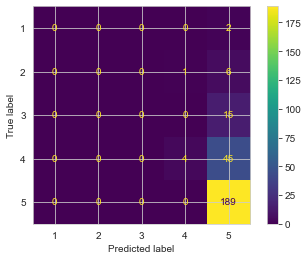

In [226]:
model_performance_class(y_train, y_pred_train, y_test, y_pred_test,grid_rfc)

I am gonna look at the importance of the paramenters.

In [227]:
importance = list(grid_rfc.best_estimator_.feature_importances_)


In [228]:
cols = list(X_train.columns)

pd.DataFrame(zip(cols,importance),columns= ["Feature","Importance"])

,Feature,Importance
0,Length,0.096634
1,num_charac,0.096313
2,menu,0.020605
3,course,0.016691
4,wine,0.020014
5,greenhouse,0.019773
6,service,0.020023
7,great,0.018273
8,meal,0.015445
9,good,0.043076


## 8.3. Randoom Forest Classifier  with balanced classes

In [492]:
params = {'n_estimators': [100, 200], 'max_depth' : [2,6,10,15,20]}


grid_rfc_2 = GridSearchCV(RandomForestClassifier(), params, cv=5)

grid_rfc_2.fit(X_b_train,y_b_train)

grid_rfc_2.best_estimator_

#RandomForestClassifier(max_depth=10)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [493]:
grid_rfc_2.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [494]:
grid_rfc_2.best_score_

0.9408970976253297

In [495]:
y_pred_train =grid_rfc_2.predict(X_b_train)

In [496]:
y_pred_test =grid_rfc_2.predict(X_b_test)

In [497]:
model_performance_class(y_b_train, y_pred_train, y_b_test, y_pred_test,grid_rfc_2)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       379
           2       1.00      1.00      1.00       379
           3       1.00      1.00      1.00       379
           4       1.00      1.00      1.00       379
           5       1.00      1.00      1.00       379

    accuracy                           1.00      1895
   macro avg       1.00      1.00      1.00      1895
weighted avg       1.00      1.00      1.00      1895

Results obtained for the TEST SET
The Cohen's Kappa is: 0.08
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        15
           4       0.31      0.27      0.29        49
           5       0.74      0.84      0.79       189

    accuracy                           0.66       262
   macro

/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: X has 202 features, but DecisionTreeClassifier is expecting 52 features as input.

In [236]:
importance = list(grid_rfc_2.best_estimator_.feature_importances_)

In [237]:
cols = list(X_train.columns)

pd.DataFrame(zip(cols,importance), columns= ["Feature","Importance"])

,Feature,Importance
0,Length,0.097701
1,num_charac,0.102443
2,menu,0.018913
3,course,0.021192
4,wine,0.022331
5,greenhouse,0.020800
6,service,0.023171
7,great,0.017388
8,meal,0.017682
9,good,0.026182


# 9. TF-IDF 

In [253]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In order to use TfidfTransformer you will first have to create a count vectorizer to count the number of words, limit your vocabulary size, apply stop words and etc. Only then you can apply TfidfTransformer.

**Initialize CountVectorizer**


In [255]:
#We limit the features to 200
cv=CountVectorizer(max_features = 200, ngram_range = (3,3), analyzer = 'word')

In [257]:
word_count_vector=cv.fit_transform(kas["cleaned"])

**Compute the IDFs**

In [258]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [259]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
df_idf.sort_values(by=['idf_weights'])

,idf_weights
well worth trip,5.779123
main course dessert,5.874434
course wine pairing,5.874434
course tasting menu,5.874434
course set menu,5.874434
...,...
love come back,6.790724
ingredient grown right,6.790724
main course chicken,6.790724
fixed choice menu,7.078406


**Compute the TFIDF score**

In [261]:
count_vector=cv.transform(kas["cleaned"])
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [263]:
feature_names = cv.get_feature_names()

#get tfidf vector for first document
first_document_vector=tf_idf_vector[1]

#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
amazing dining experience,0.0
say best meal,0.0
opted wine pairing,0.0
outside city center,0.0
overall great experience,0.0
...,...
green house garden,0.0
green house great,0.0
green house grow,0.0
greenhouse middle park,0.0


We are gonna convert a collection our reviews  into a matrix of TF-IDF features, considering 2 words together (2 g). We will use already the clean reviews, just maybe add some 2 words stop words. 

In [298]:
stop_words_customized=["wow","year","old", "daughter","wife"]

In [377]:
tidf_n2_all = TfidfVectorizer(max_features = 200, ngram_range = (2,2), analyzer = 'word',stop_words=stop_words_3g)

In [300]:
X_tidf = tidf_n3_all.fit_transform(kas["cleaned"])
# y_tidf = kas['Score']

In [295]:
X_tidf.shape

(1308, 200)

In [287]:
##arrays with IDF values
tidf_n3_all.idf_

array([6.7907244 , 6.7907244 , 6.56758085, 6.7907244 , 5.87443367,
       6.7907244 , 6.7907244 , 6.09757722, 6.23110862, 6.56758085,
       6.7907244 , 6.23110862, 6.7907244 , 6.3852593 , 6.56758085,
       6.56758085, 6.7907244 , 6.7907244 , 6.7907244 , 6.7907244 ,
       6.56758085, 6.7907244 , 6.7907244 , 6.3852593 , 7.07840648,
       5.87443367, 5.87443367, 5.87443367, 6.7907244 , 6.7907244 ,
       6.23110862, 6.56758085, 6.7907244 , 6.7907244 , 6.56758085,
       6.7907244 , 6.7907244 , 6.7907244 , 6.23110862, 6.7907244 ,
       6.7907244 , 6.7907244 , 6.3852593 , 6.7907244 , 6.23110862,
       5.97979419, 6.7907244 , 6.7907244 , 6.7907244 , 6.56758085,
       6.56758085, 6.56758085, 7.07840648, 6.3852593 , 6.7907244 ,
       6.7907244 , 6.7907244 , 6.7907244 , 6.56758085, 6.56758085,
       6.56758085, 6.7907244 , 6.3852593 , 6.7907244 , 6.7907244 ,
       6.7907244 , 6.23110862, 6.56758085, 6.56758085, 6.56758085,
       6.56758085, 6.7907244 , 5.97979419, 6.7907244 , 6.79072

In [296]:


# print idf values 
df_idf = pd.DataFrame(tidf_n3_all.idf_, index=tidf_n3_all.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
well worth trip,5.779123
main course dessert,5.874434
course wine pairing,5.874434
course tasting menu,5.874434
course set menu,5.874434
...,...
love come back,6.790724
ingredient grown right,6.790724
main course chicken,6.790724
fixed choice menu,7.078406


Notice that the words first words have the lowest IDF values. This is expected as these words appear in each more often in our collection. The lower the IDF value of a word, the less unique it is to any particular review.

In [301]:
tidf_n3_all.get_feature_names()

['amazing dining experience',
 'amazing highly recommend',
 'area well worth',
 'ask anything like',
 'back next time',
 'based available garden',
 'beautiful greenhouse middle',
 'beautiful greenhouse setting',
 'beautifully prepared presented',
 'best dining experience',
 'best meal ever',
 'best meal trip',
 'book well advance',
 'bread olive oil',
 'came highly recommended',
 'chocolate ice cream',
 'chose wine pairing',
 'come back next',
 'course cheese course',
 'course dinner menu',
 'course dinner wine',
 'course lunch menu',
 'course matching wine',
 'course meal wine',
 'course menu euro',
 'course set menu',
 'course tasting menu',
 'course wine pairing',
 'cross little bridge',
 'definitely come back',
 'definitely worth visit',
 'delicious beautifully presented',
 'delicious great wine',
 'delicious highly recommend',
 'delicious wine selection',
 'dessert wine pairing',
 'dining experience definitely',
 'dining experience ever',
 'dining experience great',
 'dinner wine 

Compute the tdif

## 9. Create data fram ewith 2g vectors

In [302]:
kas_tidf = kas.copy()

columns_tidf= [word for word in tidf_n3_all.get_feature_names()]

kas_tidf[columns_tidf]= 0

In [303]:
for words in columns_tidf:
    kas_tidf[words] = np.where(kas_tidf["cleaned"].str.contains(words) ,1,0)

In [304]:
kas_tidf

,Id,Score,Date,Title,Review,Length,num_charac,cleaned,amazing dining experience,amazing highly recommend,...,wine pairing delicious,wine pairing good,wine pairing highly,wine pairing menu,wine pairing offered,wine pairing option,wine selection excellent,wine selection good,wine tasting menu,wonderful dining experience
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15,117,poor communication towards freelancer reliable...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121,694,hour drive makkum friesland province meanderin...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157,808,dish appear weekly menu option serve given eve...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70,441,new favorite pride serving creative absolutely...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26,171,ingredient freshly picked garden dish beautifu...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,23658332,5,2009-01-12,Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...,23,153,original setup yummy organic extremely local h...,0,0,...,0,0,0,0,0,0,0,0,0,0
1304,21557669,5,2008-11-04,Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam...",94,515,ok planning coming tourist mean avoid tourist ...,0,0,...,0,0,0,0,0,0,0,0,0,0
1305,19592320,5,2008-08-31,a new must in Amsterdam,I had a great dinner at this restaurant in the...,46,264,great dinner last week august starter desert m...,0,0,...,0,0,0,0,0,0,0,0,0,0
1306,18857462,4,2008-08-11,A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...,92,547,went two friend knew already nice experience s...,0,0,...,0,0,0,0,0,0,0,0,0,0


## 9. Exploring 3g vectors frecuencies

## 9.1. Negative Reviews

In [ ]:
kas_tidf_negative= kas_tidf[kas_tidf["Score"] < 3]

### 9.1.1. 2 g vector

In [375]:
tidf_n3_neg = TfidfVectorizer(max_features = 20, ngram_range = (3,3), analyzer = 'word',stop_words=stop_words_3g)
negative_tidf = tidf_n3_neg.fit_transform(kas_tidf_negative["cleaned"])
tidf_n3_neg.get_feature_names()

['choice first course',
 'euro per person',
 'first course soup',
 'looking forward dinner',
 'main course tiny',
 'poor experience want',
 'poor impression resting',
 'poor selection cheesethere',
 'poor st impression',
 'poorer drink wine',
 'pork chorizo samphire',
 'pork main accompanied',
 'pork medallion special',
 'pork rib small',
 'pork veal preferred',
 'portion extremely small',
 'portion extremely tiny',
 'portion fab wine',
 'salad main course',
 'waiter wearing mask']

### 9.1.1. 2 g vector

In [376]:
tidf_n2_neg = TfidfVectorizer(max_features = 20, ngram_range = (2,2), analyzer = 'word',stop_words=stop_words_3g)
negative_n2_tidf = tidf_n2_neg.fit_transform(kas_tidf_negative["cleaned"])
tidf_n2_neg.get_feature_names()

['appetizer tasteless',
 'bad service',
 'bottle wine',
 'bread tasty',
 'course fish',
 'course soup',
 'dining experience',
 'first course',
 'fish bland',
 'fresh ingredient',
 'going back',
 'guinea fowl',
 'high expectation',
 'left hungry',
 'looking forward',
 'main course',
 'paid euro',
 'set menu',
 'three course',
 'three starter']

## 9.3. Neutral Reviews

In [371]:
kas_tidf_neutral= kas_tidf[kas_tidf["Score"] == 3]

### 9.3.1. 2 g vector

In [374]:
tidf_n2_neutral = TfidfVectorizer(max_features = 20, ngram_range = (2,2), analyzer = 'word',stop_words=stop_words_3g)
neutral_n2_tidf = tidf_n2_neutral.fit_transform(kas_tidf_neutral["cleaned"])
tidf_n2_neutral.get_feature_names()

['brussel sprout',
 'course menu',
 'first course',
 'fresh vegetable',
 'green house',
 'ice cream',
 'lovely setting',
 'main course',
 'nothing special',
 'paid euro',
 'per person',
 'service good',
 'set menu',
 'six course',
 'small piece',
 'small plate',
 'small portion',
 'tasting menu',
 'vegetable dish',
 'wine pairing']

### 9.3.1. 3 g vector

In [373]:
tidf_n3_neutral = TfidfVectorizer(max_features = 20, ngram_range = (3,3), analyzer = 'word',stop_words=stop_words_3g)
neutral_n3_tidf = tidf_n3_neutral.fit_transform(kas_tidf_neutral["cleaned"])
tidf_n3_neutral.get_feature_names()

['course tasting menu',
 'good great wait',
 'greenhouse middle park',
 'hour main course',
 'lamb main course',
 'main course chicken',
 'menu per person',
 'possible seated seated',
 'possibly best thing',
 'post sample menu',
 'potato crisp brought',
 'potato nothing extraodinary',
 'potato thought unusual',
 'potatoe brocolli flower',
 'potential management act',
 'review guide book',
 'serf daily menu',
 'six course tasting',
 'take long time',
 'unfortunately good night']

## 9.3. Positive Reviews 

In [ ]:
kas_tidf_positive= kas_tidf[kas_tidf["Score"] > 3]

### 9.3.1. 2 g vectors

Comment

In [369]:
tidf_n2_positive = TfidfVectorizer(max_features = 20, ngram_range = (2,2), analyzer = 'word',stop_words=stop_words_3g)
positive_n2_tidf = tidf_n2_positive.fit_transform(kas_tidf_positive["cleaned"])
tidf_n2_positive.get_feature_names()

['best meal',
 'course meal',
 'dining experience',
 'excellent service',
 'fixed menu',
 'green house',
 'grown site',
 'highly recommend',
 'highly recommended',
 'main course',
 'next time',
 'service excellent',
 'service good',
 'set menu',
 'staff friendly',
 'tasting menu',
 'vegetable grown',
 'well worth',
 'wine list',
 'wine pairing']

### 9.3.2. 3 g vectors

In [370]:
tidf_n3_positive = TfidfVectorizer(max_features = 20, ngram_range = (3,3), analyzer = 'word',stop_words=stop_words_3g)
positive_n3_tidf = tidf_n3_positive.fit_transform(kas_tidf_positive["cleaned"])
tidf_n3_positive.get_feature_names()

['back next time',
 'best dining experience',
 'best meal ever',
 'book well advance',
 'course set menu',
 'course tasting menu',
 'course wine pairing',
 'easy tram ride',
 'euro per person',
 'good wine list',
 'greenhouse middle park',
 'home grown vegetable',
 'made feel welcome',
 'main course dessert',
 'service attentive friendly',
 'set menu course',
 'staff friendly helpful',
 'vegetable grown site',
 'well worth trip',
 'wine pairing menu']

## 9.2.Modelling with 3g vectors

In [504]:
frecuencies_x_score = kas_tidf.groupby("Score")[columns_tidf].sum()
frecuencies_x_score


,amazing dining experience,amazing highly recommend,area well worth,ask anything like,back next time,based available garden,beautiful greenhouse middle,beautiful greenhouse setting,beautifully prepared presented,best dining experience,...,wine pairing delicious,wine pairing good,wine pairing highly,wine pairing menu,wine pairing offered,wine pairing option,wine selection excellent,wine selection good,wine tasting menu,wonderful dining experience
Score,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,1,1,1,1,0,0,0,...,0,3,0,0,1,0,0,1,0,1
5,3,3,2,2,8,2,2,3,2,7,...,3,1,3,6,2,3,3,4,4,5


In [307]:
from sklearn.naive_bayes import CategoricalNB

In [305]:
X_train, X_test, y_train, y_test  = split_data(kas_tidf)

In [308]:
nb = CategoricalNB()

In [311]:
nb.fit(X_train, y_train)

CategoricalNB()

In [312]:
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

IndexError: index 957 is out of bounds for axis 1 with size 954